In [7]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Model,Sequential
from keras import layers

df = pd.read_excel("/content/drive/MyDrive/School/AI/Y3T1/Deep_Learning/app_data.xlsx")

In [8]:
print(df['Diagnosis'].unique())
print(df['Management'].unique())
print(df['Severity'].unique())

target =  df['Diagnosis']
print(target.head(10))

['appendicitis' 'no appendicitis' nan]
['conservative' nan 'primary surgical' 'secondary surgical'
 'simultaneous appendectomy']
['uncomplicated' nan 'complicated']
0       appendicitis
1    no appendicitis
2    no appendicitis
3    no appendicitis
4       appendicitis
5    no appendicitis
6    no appendicitis
7    no appendicitis
8    no appendicitis
9       appendicitis
Name: Diagnosis, dtype: object


In [9]:
temp = df.copy()
data = df.copy()
for col in temp.columns:
    data[col] = pd.Categorical(temp[col]).codes
data.loc[data['Diagnosis'] == -1, 'Diagnosis'] = 1

x = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=41)

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.2,
                                                  random_state=42)

In [10]:
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

initializer = tf.keras.initializers.HeNormal()
network = Sequential([
    layers.Dense(57,
                 kernel_initializer=initializer,
                 activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(0.001),
                 input_shape=(57, )),
    layers.Dense(1, activation='sigmoid')])


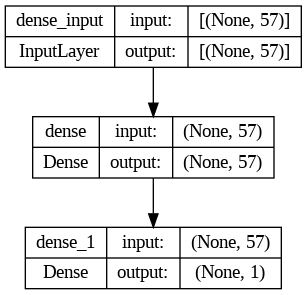

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(network, show_shapes=True)

In [13]:
network.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

second_weights = network.get_weights()
history = network.fit(x_train,
                      y_train,
                      epochs=20,
                      batch_size=128,
                      validation_data=(x_val, y_val))

Epoch 1/20
4/4 [==============================] - 4s 229ms/step - loss: 28.1342 - accuracy: 0.4260 - val_loss: 22.7993 - val_accuracy: 0.4000
Epoch 2/20
4/4 [==============================] - 0s 34ms/step - loss: 17.0256 - accuracy: 0.4520 - val_loss: 16.2676 - val_accuracy: 0.4080
Epoch 3/20
4/4 [==============================] - 0s 24ms/step - loss: 12.8638 - accuracy: 0.5060 - val_loss: 13.6040 - val_accuracy: 0.4960
Epoch 4/20
4/4 [==============================] - 0s 25ms/step - loss: 11.6520 - accuracy: 0.5560 - val_loss: 12.2640 - val_accuracy: 0.5360
Epoch 5/20
4/4 [==============================] - 0s 23ms/step - loss: 10.2580 - accuracy: 0.5640 - val_loss: 9.8713 - val_accuracy: 0.5360
Epoch 6/20
4/4 [==============================] - 0s 18ms/step - loss: 7.2243 - accuracy: 0.5740 - val_loss: 7.6108 - val_accuracy: 0.5120
Epoch 7/20
4/4 [==============================] - 0s 13ms/step - loss: 5.3030 - accuracy: 0.5960 - val_loss: 6.4988 - val_accuracy: 0.4960
Epoch 8/20
4/4 [=

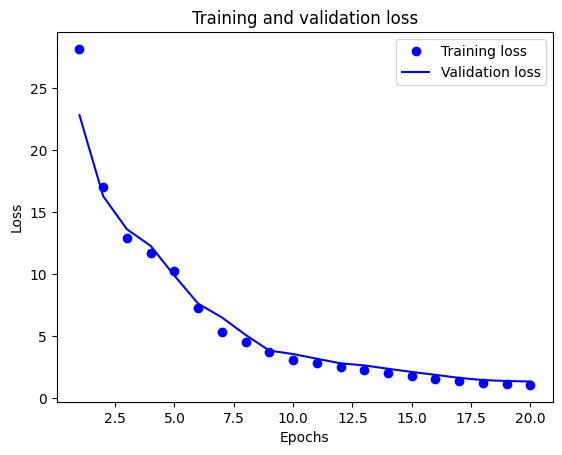

Train loss / accuracy
16/16 [==============================] - 0s 4ms/step - loss: 0.9998 - accuracy: 0.8240
[0.9997832775115967, 0.8240000009536743]
Test loss / accuracy
5/5 [==============================] - 0s 18ms/step - loss: 1.2249 - accuracy: 0.8280
[1.2249464988708496, 0.8280254602432251]


In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

print('Train loss / accuracy')
results = network.evaluate(x_train, y_train)
print(results)
print('Test loss / accuracy')
results = network.evaluate(x_test, y_test)
print(results)